ibmqfactory.load_account:WARNING:2021-12-17 15:57:32,373: Credentials are already in use. The existing account in the session will be replaced.


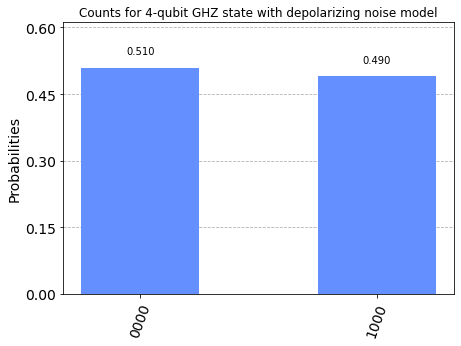

In [9]:
#IMPORTS
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import Aer, IBMQ, execute
from qiskit.providers.aer import noise
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

provider = IBMQ.load_account()
provider.backends()
backend = provider.get_backend('ibmq_quito')
noise_model = noise.NoiseModel.from_backend(backend)

device = provider.get_backend('ibmq_quito')
properties = device.properties()
coupling_map = device.configuration().coupling_map


#Form Circuit
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#Gate Operations
circuit.ry(0.909116063, qreg_q[0])
circuit.ry(1.0255887, qreg_q[1])
circuit.ry(1.21828291, qreg_q[2])
circuit.h(qreg_q[3])
circuit.z(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[3], creg_c[3])


editor = CircuitComposer(circuit=circuit)
editor

#TAKEN FROM QISKIT AER EXAMPLE GIVEN BY IBM
# Get the basis gates for the noise model
basis_gates = noise_model.basis_gates

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute noisy simulation and get counts
result_noise = execute(circuit, simulator,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(circuit)
plot_histogram(counts_noise, title="Counts for 4-qubit GHZ state with depolarizing noise model")
